<font size = "5"> **[Image Tools](2_Image_Tools.ipynb)** </font>

<hr style="height:2px;border-top:4px solid #FF8200" />


#  Analyzing Spot Diffraction Pattern


[<img src=https://www.coeuscreativegroup.com/wp-content/uploads/2020/04/download-button.png, width=125>](https://raw.githubusercontent.com/pycroscopy/pyTEMlib/main/notebooks/Imaging/D2-Diffraction_Spots.ipynb) 

[![OpenInColab](https://colab.research.google.com/assets/colab-badge.svg)](
    https://colab.research.google.com/github/pycroscopy/pyTEMlib/blob/main/notebooks/Imaging/D2-Diffraction_Spots.ipynb)
    
    

part of 

<font size = "5"> **[pyTEMlib](https://pycroscopy.github.io/pyTEMlib/about.html)**</font>

a [pycroscopy](https://pycroscopy.github.io/pycroscopy/about.html) ecosystem package


Notebook by Gerd Duscher, 2025

Microscopy Facilities<br>
Institute of Advanced Materials & Manufacturing<br>
The University of Tennessee, Knoxville

Model based analysis and quantification of data acquired with transmission electron microscopes


## Content
An introduction into **diffraction_tools** and how to use the functions in this package to 
index spot diffraction pattern of **single crystal** sample areas.

The scope of this notebook includes calculation and plotting of 
- allowed, forbidden and dynamically activated Bragg reflections,
- Kikuchi- and HOLZ-lines.

The diffraction vectors are given in polar coordinates and internally in Å or 1/Å because that is the base unit of the ase (atomic simulation evironment) package. The package ase is the crystallography package used in pyTEMlib and allows easy conversion to MD and DFT calculations as well as abTEM image and diffraction simulations. Please note that we often plot in the for microscopy more convenient units of nm and 1/nm.


An explanation on the physcial background can be found in the *[Diffraction](https://gduscher.github.io/MSE672-Introduction-to-TEM/diffraction/ch2-00-diffraction/)* chapter of MSE672-Introduction to TEM


## Install pyTEMlib

If you have not done so in the [Introduction Notebook](../0_pyTEMlib.ipynb), please test and install [pyTEMlib](https://github.com/gduscher/pyTEMlib) and other important packages with the code cell below.



## Load relevant python packages
### Check Installed Packages

In [1]:
import sys
import importlib.metadata
def test_package(package_name):
    """Test if package exists and returns version or -1"""
    try:
        version = importlib.metadata.version(package_name)
    except importlib.metadata.PackageNotFoundError:
        version = '-1'
    return version

if test_package('pyTEMlib') < '0.2024.1.0':
    print('installing pyTEMlib')
    !{sys.executable} -m pip install git+https://github.com/pycroscopy/pyTEMlib.git@main -q --upgrade

if 'google.colab' in sys.modules:
    !{sys.executable} -m pip install numpy==1.24.4
print('done')

done


### Load the plotting and figure packages
Import the python packages that we will use:

Beside the basic numerical (numpy) and plotting (pylab of matplotlib) libraries,
* three dimensional plotting
and some libraries from the book
* diffraction_tools library.

In [655]:
# import matplotlib and numpy
#                       use "inline" instead of "notebook" for non-interactive plots
%matplotlib  widget
import matplotlib.pyplot as plt
import numpy as np
import sys
if 'google.colab' in sys.modules:
    from google.colab import output
    output.enable_custom_widget_manager()

# 3D plotting package used
from mpl_toolkits.mplot3d import Axes3D # 3D plotting 

# additional package 
import itertools 
import scipy

# Import libraries from the pyTEMlib
%load_ext autoreload
%autoreload 2
sys.path.insert(0, '../../')
import pyTEMlib

__notebook_version__ = '2025.12.12'
print('pyTEM version: ', pyTEMlib.__version__)
print('notebook version: ', __notebook_version__)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
pyTEM version:  0.2025.12.1
notebook version:  2025.12.12



## Define Crystal

Define a Crystal as an ase object.
 
That allows for easy access to things like reciprocal unit cells (*atoms.cell.reciprocal()*)

With the provided crystal tools it is straight forward to change to 'Gold', 'graphite', 'Pt', or any other supported crystals. Adding structruees with POSCAR or cif files is also supported.

## Plot Diffraction Pattern
For a minimum we need the zone_axis in Miller indices and the acceleration voltage fo the TEM.
We pack those information in a dictionary and run *get_bragg_reflections* from *diffraction_tools*

> Note:
>
> We calculate the Bragg reflections in polar coordinates.

In [656]:
#Initialize the dictionary with all the input
atoms = pyTEMlib.crystal_tools.structure_by_name('Silicon')
print(atoms)


Lattice(symbols='Si8', pbc=True, cell=[5.43088, 5.43088, 5.43088])


Of the 357910 tested reciprocal lattice points 1700 have an excitation error less than 0.30 1/nm
Of the 1700 possible reflection 320 are allowed.
Of those, there are 24 in ZOLZ  and 296 in HOLZ
Of the 196 forbidden reflection in ZOLZ  0 can be dynamically activated.


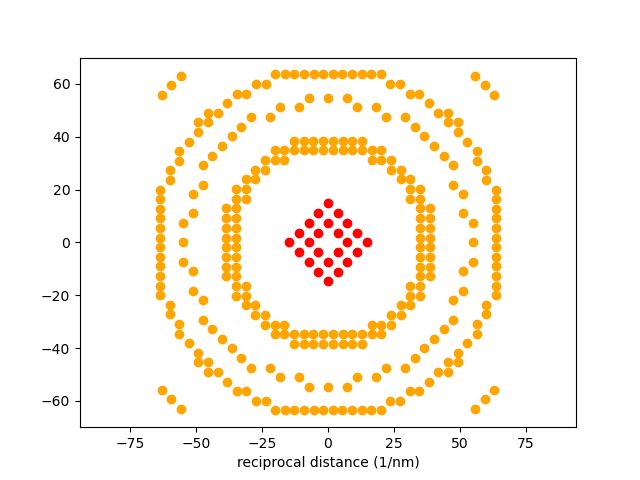

In [657]:
# --------------- INPUT ------------------------
zone_hkl = np.array([1, 1, 0])
zone_hkl = np.array([0, 0, 1])
hkl_max = 35  #  maximum allowed Miller index
sg_max = 0.03   # 1/Ang  maximum allowed excitation error

acceleration_voltage = 200.0 * 1000.0 #V

rotation = np.radians(0)  # rotation of diffraction pattern
# -------------------------------------------

tags = {'zone_hkl': zone_hkl,
        'hkl_max': hkl_max,
        'Sg_max': sg_max,
        'acceleration_voltage':  acceleration_voltage}
diff_dict ={}
diff_dict = pyTEMlib.diffraction_tools.get_bragg_reflections(atoms, tags, verbose=True) 


# Simple Plot
ZOLZ = diff_dict['allowed']['ZOLZ']
HOLZ = diff_dict['allowed']['HOLZ']
r = diff_dict['allowed']['g'][:, 0]
phi = diff_dict['allowed']['g'][:, 1]

x = r *np.cos(phi+rotation)*10
y = r * np.sin(phi+rotation)*10


plt.figure()
plt.scatter(x[ZOLZ], y[ZOLZ], label='ZOLZ allowed', c='r')
plt.scatter(x[HOLZ], y[HOLZ], label="HOLZ allowed", c ='orange')
plt.axis('equal')
plt.xlabel('reciprocal distance (1/nm)');

### Allowed, Forbidden and Dynamically-Activated Reflections

We can now plot allowed forbidden and dynamically activated Reflections independently.

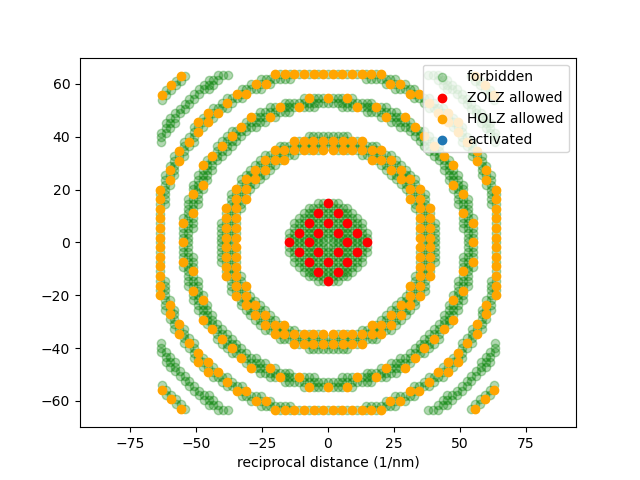

In [658]:
# ---- Input -----
rotation = np.radians(0)
# ----------------
ZOLZ = diff_dict['allowed']['ZOLZ']
HOLZ = diff_dict['allowed']['HOLZ']
r = diff_dict['allowed']['g'][:, 0]
phi = diff_dict['allowed']['g'][:, 1]

x = r *np.cos(phi+rotation)*10
y = r * np.sin(phi+rotation)*10


ZOLZ_forbidden = diff_dict['forbidden']['ZOLZ']
HOLZ_forbidden = diff_dict['forbidden']['HOLZ']
activated = (diff_dict['forbidden']['dynamically_activated'])

r_forbidden = diff_dict['forbidden']['g'][:, 0]
phi_forbidden = diff_dict['forbidden']['g'][:, 1]
x_forbidden = r_forbidden *np.cos(phi_forbidden+rotation)*10
y_forbidden = r_forbidden *np.sin(phi_forbidden+rotation)*10

x_dynamic = x_forbidden[ZOLZ_forbidden][activated]
y_dynamic = y_forbidden[ZOLZ_forbidden][activated]


plt.figure()
plt.scatter(x_forbidden, y_forbidden, label='forbidden', c='green', alpha = .3 )
plt.scatter(x[ZOLZ], y[ZOLZ], label='ZOLZ allowed', c='r')
plt.scatter(x[HOLZ], y[HOLZ], label="HOLZ allowed", c ='orange')


plt.scatter(x_dynamic, y_dynamic, label='activated')
plt.axis('equal')
plt.xlabel('reciprocal distance (1/nm)')
plt.legend();


### Plotting in Polar Coordinates

Like for ring-diffraction pattern, it is illustrative to look at the diffraction pattern in polar coordinates.

You will notice that we internally use only polar cooredinates.

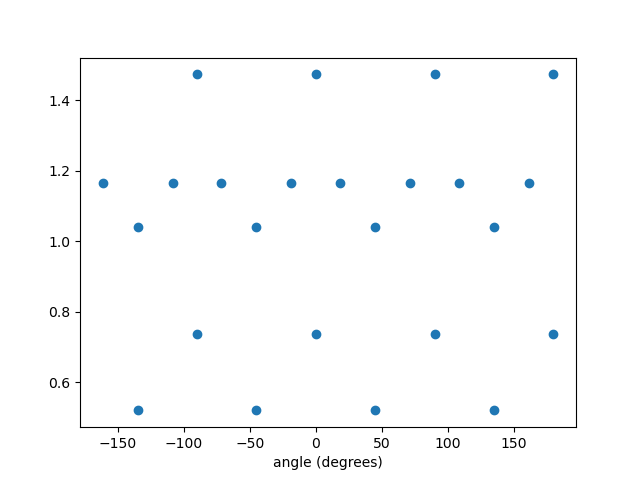

In [659]:
# ---- Input -----
rotation = np.radians(-10)
# ----------------
ZOLZ = diff_dict['allowed']['ZOLZ']
HOLZ = diff_dict['allowed']['HOLZ']
r = diff_dict['allowed']['g'][:, 0]
phi = diff_dict['allowed']['g'][:, 1]

plt.figure()
plt.scatter( np.degrees(phi)[ZOLZ], r[ZOLZ])
plt.xlabel('angle (degrees)');


### Plot Kikuchi Pattern
With the knowledge that the slope $m = \tan(\phi)$
we can plot the  perpendicular bisector of the line from origin to the Bragg peaks which are the Kikuchi lines.

Text(0.5, 0, 'reciprocal distance (1/nm)')

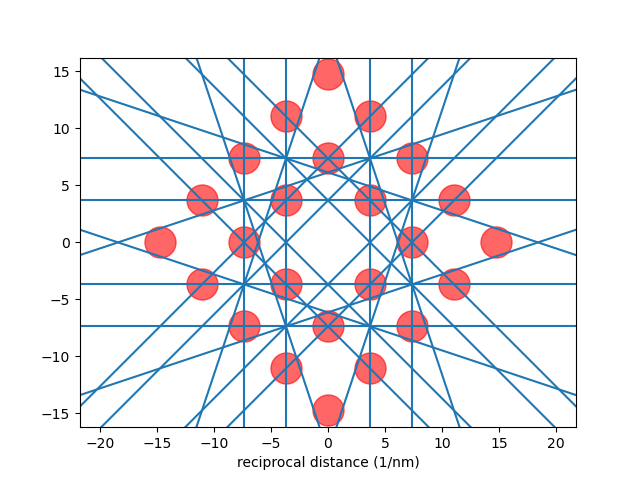

In [663]:
# ---- Input -----
rotation = np.radians(0)
size = 500 # mrad
# ----------------
ZOLZ = diff_dict['allowed']['ZOLZ']

r = diff_dict['allowed']['g'][ZOLZ, 0]*10
phi = diff_dict['allowed']['g'][ZOLZ, 1]

x = r * np.cos(phi+rotation)
y = r * np.sin(phi+rotation)

plt.figure()
plt.scatter(x,y, s=size, alpha = .6, c= 'r')
for i, ph in enumerate(phi-np.pi/2): 
    plt.axline( (x[i]/2,y[i]/2), slope=(np.tan(ph)))
plt.axis('equal')
plt.xlabel('reciprocal distance (1/nm)')

Or with the help of a function and the HOLZ line equation for d_theta ($\Delta \theta$) in the zero order Laue zone (ZOLZ)

d_theta ($d\theta$) in units of length is stored in the 4th dimension of the g vectors for convenience.

In [664]:
def plotting_coordinates(g, rotation=0, feature='spot'):
    if feature == 'line':
        # Note: d_theta in g{: 3] is negative so we need to rotate phi by 180 degree
        x = g[:, 3] * np.cos(g[:, 1]+np.pi+rotation)*10
        y = g[:, 3] * np.sin(g[:, 1]+np.pi+rotation)*10
        return np.stack((x, y, np.tan(g[:, 1]+rotation-np.pi/2)), axis= 1)

    x = g[:, 0] * np.cos(g[:, 1]+rotation)*10
    y = g[:, 0] * np.sin(g[:, 1]+rotation)*10
    return np.stack((x, y), axis= 1) 

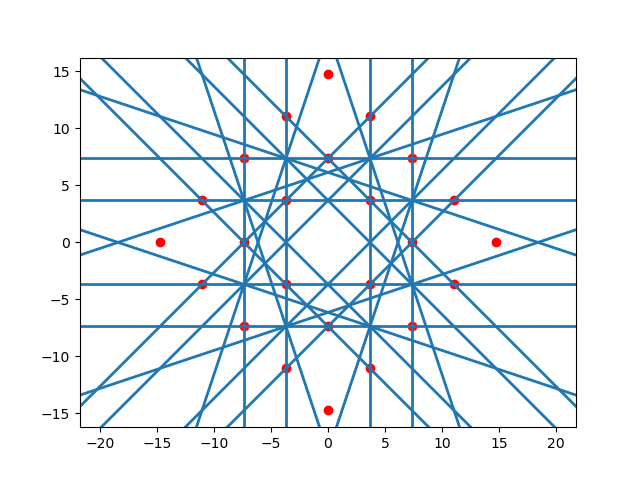

In [665]:
ZOLZ = diff_dict['allowed']['ZOLZ']

xy = plotting_coordinates(diff_dict['allowed']['g'][ZOLZ], feature='spot')
kikuchi = plotting_coordinates(diff_dict['allowed']['g'], feature='line')
plt.figure()
plt.scatter(xy[:, 0], xy[:,1], color = 'r')
for line in kikuchi[ZOLZ]:
    plt.axline( (line[0], line[1]),slope=line[2], linewidth = 2)

plt.axis('equal');

## Plot HOLZ Lines

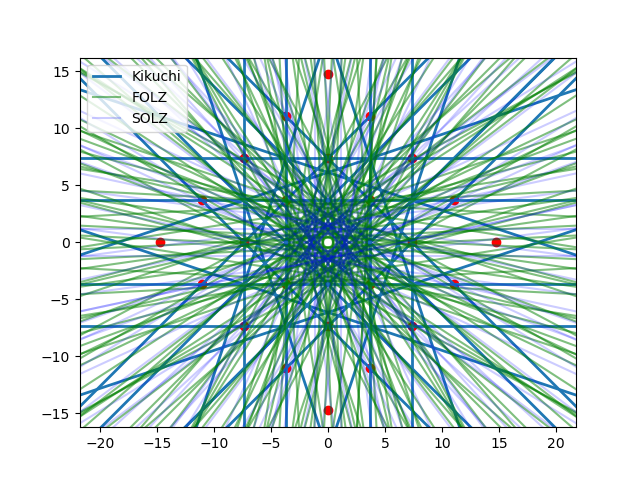

In [666]:
ZOLZ = diff_dict['allowed']['ZOLZ']
FOLZ = diff_dict['allowed']['FOLZ']
SOLZ = diff_dict['allowed']['SOLZ']
xy = plotting_coordinates(diff_dict['allowed']['g'][ZOLZ], feature='spot')
kikuchi = plotting_coordinates(diff_dict['allowed']['g'], feature='line')
plt.figure()
plt.scatter(xy[:, 0], xy[:,1], color = 'r')
line = (kikuchi[ZOLZ])[0]
plt.axline( (line[0], line[1]), slope=line[2], linewidth=2, label='Kikuchi')
for line in kikuchi[ZOLZ]:
    plt.axline( (line[0], line[1]), slope=line[2], linewidth=2)
line = (kikuchi[FOLZ])[0]
plt.axline( (line[0], line[1]), slope=line[2], color='g', alpha=0.5, label='FOLZ')
for line in kikuchi[FOLZ]:
    plt.axline( (line[0], line[1]),slope=line[2], color='g', alpha=0.5)

line = (kikuchi[SOLZ])[0]
plt.axline( (line[0], line[1]), slope=line[2], color='b', alpha=0.2, label='SOLZ')
for line in kikuchi[SOLZ]:
    plt.axline( (line[0], line[1]), slope=line[2], color='b', alpha = 0.2)
plt.axis('equal')
plt.legend();

### HOLZ Lines of a Higher Order Zone Axis

Of the 6858 tested reciprocal lattice points 156 have an excitation error less than 0.30 1/nm
Of the 156 possible reflection 28 are allowed.
Of those, there are 4 in ZOLZ  and 24 in HOLZ
Of the 46 forbidden reflection in ZOLZ  0 can be dynamically activated.


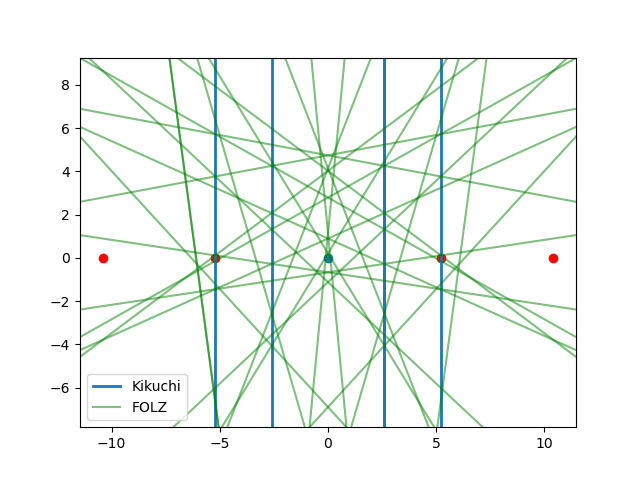

In [667]:
tags = {'acceleration_voltage_V': 99.2 * 1000.0,  # V
      'convergence_angle_mrad': 7.15,  # mrad;
      'zone_hkl': np.array([1, 2, -2]),
      'mistilt': np.array([0, 0, 0]),  # mistilt in degrees
      'Sg_max': .03,  # 1/A  maximum allowed excitation error
      'hkl_max': 9}  # Highest evaluated Miller indices

diff_dict = {}
diff_dict = pyTEMlib.diffraction_tools.get_bragg_reflections(atoms, tags, verbose=True) 


ZOLZ = diff_dict['allowed']['ZOLZ']
FOLZ = diff_dict['allowed']['FOLZ']
SOLZ = diff_dict['allowed']['SOLZ']
xy = plotting_coordinates(diff_dict['allowed']['g'][ZOLZ], feature='spot')
kikuchi = plotting_coordinates(diff_dict['allowed']['g'], feature='line')
plt.figure()
plt.scatter(xy[:, 0], xy[:,1], color = 'r')
line = (kikuchi[ZOLZ])[0]
plt.axline( (line[0], line[1]), slope=line[2], linewidth=2, label='Kikuchi')
for line in kikuchi[ZOLZ]:
    plt.axline( (line[0], line[1]), slope=line[2], linewidth=2)
line = (kikuchi[FOLZ])[0]
plt.axline( (line[0], line[1]), slope=line[2], color='g', alpha=0.5, label='FOLZ')
for line in kikuchi[FOLZ]:
    plt.axline( (line[0], line[1]),slope=line[2], color='g', alpha=0.5)
if SOLZ.sum()>0:
    line = (kikuchi[SOLZ])[0]
    plt.axline( (line[0], line[1]), slope=line[2], color='b', alpha=0.2, label='SOLZ')
    for line in kikuchi[SOLZ]:
        plt.axline( (line[0], line[1]), slope=line[2], color='b', alpha = 0.2)
plt.axis('equal')
plt.scatter(0,0)
plt.legend();

### Comparison With CBED Pattern

In [671]:
image = plt.imread("./Zuo-HOLZ-experiment.jpg")
plt.figure()
extent = np.array([-2.7006,  2.8206, -2.15  ,  3.01  ])
extent[:2] -= 0.125
extent[2:] -= 0.06
extent /=1.03

plt.imshow(image, extent=extent)
plt.axis('auto')
for line in kikuchi[FOLZ]:
    plt.axline( (line[0], line[1]),slope=line[2], color='g', alpha=0.5)
if SOLZ.sum()>0:
    line = (kikuchi[SOLZ])[0]
    plt.axline( (line[0], line[1]), slope=line[2], color='b', alpha=0.2, label='SOLZ')
    for line in kikuchi[SOLZ]:
        plt.axline( (line[0], line[1]), slope=line[2], color='b', alpha = 0.2)

plt.scatter(0,0)
plt.xlim(-2.5,2)
plt.ylim(-2,2.5)
plt.axis('equal')
extent;

FileNotFoundError: [Errno 2] No such file or directory: './Zuo-HOLZ-experiment.jpg'

Of the 29790 tested reciprocal lattice points 421 have an excitation error less than 0.30 1/nm
Of the 421 possible reflection 79 are allowed.
Of those, there are 4 in ZOLZ  and 75 in HOLZ
Of the 46 forbidden reflection in ZOLZ  0 can be dynamically activated.


array([-2.74330097,  2.61708738, -2.14563107,  2.86407767])

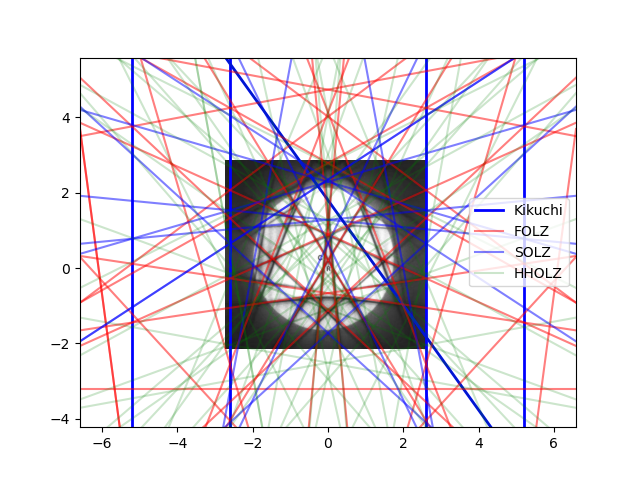

In [646]:
tags = {'acceleration_voltage_V': 99.2 * 1000.0,  # V
      'convergence_angle_mrad': 7.15,  # mrad;
      'zone_hkl': np.array([1, 2, -2]),
      'mistilt': np.array([0, 0, 0]),  # mistilt in degrees
      'Sg_max': .03,  # 1/A  maximum allowed excitation error
      'hkl_max': 15}  # Highest evaluated Miller indices

diff_dict = {}
diff_dict = pyTEMlib.diffraction_tools.get_bragg_reflections(atoms, tags, verbose=True) 

zolz = diff_dict['allowed']['ZOLZ']
folz = diff_dict['allowed']['FOLZ']
solz = diff_dict['allowed']['SOLZ']
hholz = diff_dict['allowed']['HOLZ_plus']

xy = plotting_coordinates(diff_dict['allowed']['g'][zolz], feature='spot')
kikuchi = plotting_coordinates(diff_dict['allowed']['g'], feature='line')
plt.close('all')
plt.figure()
extent = np.array([-2.7006,  2.8206, -2.15  ,  3.01  ])
extent[:2] -= 0.125
extent[2:] -= 0.06
extent /=1.03
plt.imshow(image, extent=extent)
plt.axis('auto')
plt.axline( (line[0], line[1]), slope=line[2], color='b', alpha=1, linewidth =2, label='Kikuchi')
for line in kikuchi[zolz]:
    plt.axline( (line[0], line[1]),slope=line[2], color='b', alpha=1, linewidth =2)
if folz.sum()>0:
    line = (kikuchi[folz])[0]
    plt.axline( (line[0], line[1]), slope=line[2], color='r', alpha=0.5, label='FOLZ')
    for line in kikuchi[FOLZ]:
        plt.axline( (line[0], line[1]), slope=line[2], color='r', alpha = 0.5)    
if solz.sum()>0:
    line = (kikuchi[solz])[0]
    plt.axline( (line[0], line[1]), slope=line[2], color='b', alpha=0.5, label='SOLZ')
    for line in kikuchi[solz]:
        plt.axline( (line[0], line[1]), slope=line[2], color='b', alpha = 0.5)
if hholz.sum()>0:
    line = (kikuchi[hholz])[0]
    plt.axline( (line[0], line[1]), slope=line[2], color='g', alpha=0.2, label='HHOLZ')
    for line in kikuchi[hholz]:
        plt.axline( (line[0], line[1]), slope=line[2], color='g', alpha = 0.2)

plt.legend()
plt.axis('equal')
extent

In [590]:
O_stig = 1.07

tagsD={}
tagsD['convergence_angle_A-1'] = .19
tagsD['plot_rotation'] = 162
tagsD['plot image FOV'] = .516
tagsD['plot shift x'] = 0.006
tagsD['plot shift y'] = .043

l = -tagsD['plot image FOV']/2*O_stig + tagsD['plot shift x']
r = tagsD['plot image FOV']/2*O_stig + tagsD['plot shift x']
t = -tagsD['plot image FOV']/2+tagsD['plot shift y']
b = tagsD['plot image FOV']/2+tagsD['plot shift y']
np.array([l, r, t, b])*10

array([-2.7006,  2.8206, -2.15  ,  3.01  ])

In [ ]:
def calculate_holz(dif):
    """ Calculate HOLZ lines (of allowed reflections)"""
    intensities = diff_dict['allowed']['intensities']
    k_0 = diff_dict['K_0']

    g_norm_allowed = diff_dict['allowed']['g'][:, 0]

    # Dynamic Correction
    # Equation Spence+Zuo 3.86a
    print(np.where(k_0*diff_dict['allowed']['excitation_error']==0))
    
    gamma_1 = - 1./(2.*k_0) * (intensities / (2.*k_0*diff_dict['allowed']['excitation_error'])).sum()
    # Equation Spence+Zuo 3.84
    kg = k_0 - k_0*gamma_1/(diff_dict['allowed']['g'][:, 2]+1e-15)
    kg[diff_dict['allowed']['ZOLZ']] = k_0

    # Calculate angle between K0 and deficient cone vector
    # For dynamic calculations K0 is replaced by kg
    kg[:] = k_0
    d_theta = np.abs(np.arcsin(g_norm_allowed/k_0/2.) - (np.arcsin(diff_dict['allowed']['g'][:, 2])
                                                            /(g_norm_allowed+1e-15)))
    # print('k', d_theta, g_norm_allowed, k_0)
    # calculate length of distance of deficient cone to K0 in ZOLZ plane
    
    # Calculate nearest point of HOLZ and Kikuchi lines
    HOLZ = dif['allowed']['HOLZ']
    g_closest = dif['allowed']['g'] * 1.0
    print('len', len(g_closest))
    
    print(k_0)
    g_closest[:, 0] = 2 * np.sin(d_theta.real/2) * k_0
    g_closest[:, 1] += np.pi
    
    print(np.round(2 * np.sin(d_theta.real/2) * k_0, 2))
    # calculate and save line in Hough space coordinates (distance and theta)
    g_excess = dif['allowed']['g'] *1.0
    g_excess[:, 0] += dif['allowed']['g'][:, 0]
    
    dif['HOLZ'] = {}
    dif['HOLZ']['g_deficient'] = g_closest
    dif['HOLZ']['g_excess'] = g_excess
    dif['HOLZ']['ZOLZ'] = dif['allowed']['ZOLZ']
    dif['HOLZ']['HOLZ'] = dif['allowed']['HOLZ']
    # dif['HOLZ']['FOLZ'] = dif['allowed']['FOLZ']
    # dif['HOLZ']['SOLZ'] = dif['allowed']['SOLZ']
    # dif['HOLZ']['HHOLZ'] = dif['allowed']['HHOLZ']  # even higher HOLZ
    dif['HOLZ']['hkl'] = dif['allowed']['hkl']
    dif['HOLZ']['intensities'] = intensities

    return dif

In [64]:
def plotting_coordinates(g, rotation=0, feature='spot'):
    x = g[:, 0] * np.cos(g[:, 1]+rotation)*10
    y = g[:, 0] * np.sin(g[:, 1]+rotation)*10

    if feature == 'line':
        return np.stack((x, y, np.tan(g[:, 1]+rotation+np.pi/2)), axis= 1)
    return np.stack((x, y), axis= 1) 

Of the 19682 tested reciprocal lattice points 507 have an excitation error less than 0.50 1/nm
Of the 507 possible reflection 106 are allowed.
Of those, there are 12 in ZOLZ  and 94 in HOLZ
Of the 72 forbidden reflection in ZOLZ  0 can be dynamically activated.


Text(0.5, 0, 'reciprocal distance (1/nm)')

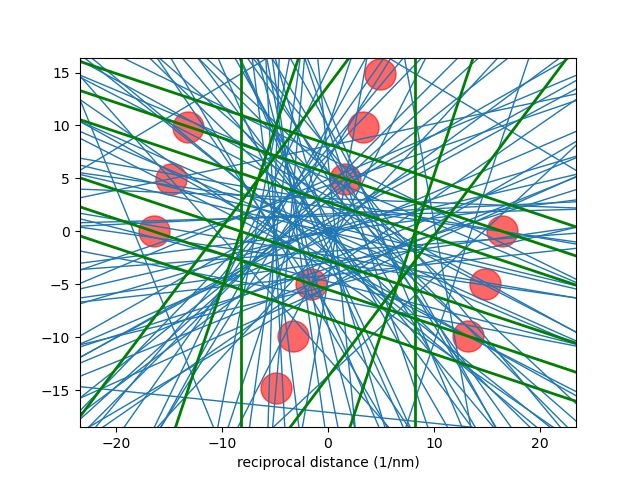

In [31]:
tags = {'acceleration_voltage_V': 99.2 * 1000.0,  # V
      'convergence_angle_mrad': 7.15,  # mrad;
      'zone_hkl': np.array([-2, 2, 1]),
      'mistilt': np.array([0, 0, 0]),  # mistilt in degrees
      'Sg_max': .05,  # 1/A  maximum allowed excitation error
      'hkl_max': 13}  # Highest evaluated Miller indices

diff_dict = {}
diff_dict = pyTEMlib.diffraction_tools.get_bragg_reflections(atoms, tags, verbose=True) 

ZOLZ = diff_dict['allowed']['ZOLZ']
r = diff_dict['allowed']['g'][ZOLZ, 0]*10
phi = diff_dict['allowed']['g'][ZOLZ, 1]

x = r *np.cos(phi+rotation)
y = r * np.sin(phi+rotation)
HOLZ = diff_dict['allowed']['HOLZ']
r_k = diff_dict['HOLZ']['g_deficient'][HOLZ, 0]*10
phi_k = diff_dict['HOLZ']['g_deficient'][HOLZ, 1]
x_k = r_k *np.cos(phi_k+rotation)
y_k = r_k * np.sin(phi_k+rotation)

plt.figure()
plt.scatter(x,y, s=500, alpha = .6, c='r')

for i, ph in enumerate(phi_k): 
    plt.axline( (x_k[i],y_k[i]),slope=(np.tan(ph+np.pi/2)), linewidth=1)
for i, ph in enumerate(phi): 
    plt.axline( (x[i]/2,y[i]/2),slope=(np.tan(ph+np.pi/2)), c='g', linewidth=2)
plt.scatter([0], [0])
plt.axis('equal')
plt.xlabel('reciprocal distance (1/nm)')

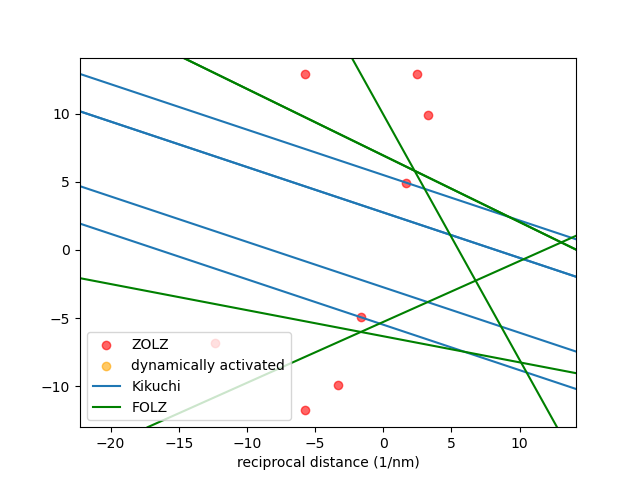

In [56]:
tags = {'acceleration_voltage_V': 99.2 * 1000.0,  # V
      'convergence_angle_mrad': 7.15,  # mrad;
      'zone_hkl': np.array([-2, 2, 1]),
      'mistilt': np.array([0, 0, 0]),  # mistilt in degrees
      'Sg_max': .03,  # 1/A  maximum allowed excitation error
      'hkl_max': 5}  # Highest evaluated Miller indices

diff_dict = pyTEMlib.diffraction_tools.get_bragg_reflections(atoms, tags) 


zolz = diff_dict['allowed']['ZOLZ']
xy_zolz = plotting_coordinates(diff_dict['allowed']['g'][:])

g_f = diff_dict['forbidden']['g'][diff_dict['forbidden']['ZOLZ']]
dynamic = diff_dict['forbidden']['dynamically_activated']
xy_dynamic = plotting_coordinates(g_f[dynamic])
kikuchi = diff_dict['HOLZ']['ZOLZ']
xy_kikuchi = plotting_coordinates(diff_dict['HOLZ']['g_deficient'][kikuchi], feature='line')
folz = np.logical_or(diff_dict['HOLZ']['FOLZ'], diff_dict['HOLZ']['SOLZ']) 
folz = diff_dict['HOLZ']['FOLZ']
solz = diff_dict['HOLZ']['SOLZ']
hholz = diff_dict['HOLZ']['HOLZ_plus']
xy_folz = plotting_coordinates(diff_dict['HOLZ']['g_deficient'][folz], feature='line')
xy_solz = plotting_coordinates(diff_dict['HOLZ']['g_deficient'][solz], feature='line')
xy_hholz = plotting_coordinates(diff_dict['HOLZ']['g_deficient'][hholz], feature='line')


plt.close('all')
plt.figure()
plt.scatter(xy_zolz[:, 0], xy_zolz[:, 1], alpha = .6, c='r', label='ZOLZ')
plt.scatter(xy_dynamic[:, 0], xy_dynamic[:, 1], alpha = .6, c='orange', label='dynamically activated')
plt.axline(xy_kikuchi[0, :2], slope=xy_kikuchi[0, 2], label='Kikuchi')
for xy in xy_kikuchi:
    plt.axline(xy[:2], slope=xy[2])

if len(xy_folz) > 0:
    plt.axline(xy_folz[0, :2], slope=xy_folz[0, 2], label='FOLZ', c='g')
    for xy in xy_folz:
        plt.axline(xy[:2], slope=xy[2], c='g')

if len(xy_solz)>0:
    plt.axline(xy_solz[0, :2], slope=xy_solz[0, 2], label='SOLZ', c='g' ,alpha=0.5)
    for xy in xy_solz:
        plt.axline(xy[:2], slope=xy[2], c='g', alpha=0.5)
    if len(xy_hholz) > 0:
        plt.axline(xy_hholz[0, :2], slope=xy_hholz[0, 2], label='HHOLZ', c='r' ,alpha=0.2)
        for xy in xy_hholz:
            plt.axline(xy[:2], slope=xy[2], c='r', alpha=0.2)
plt.axis('equal')
plt.xlabel('reciprocal distance (1/nm)')
plt.legend();

## Calculation and Plotting with pyTEMlib
The parameters controlling the plotting output are defined in the 'output' subdictionory.

Default values are applied.

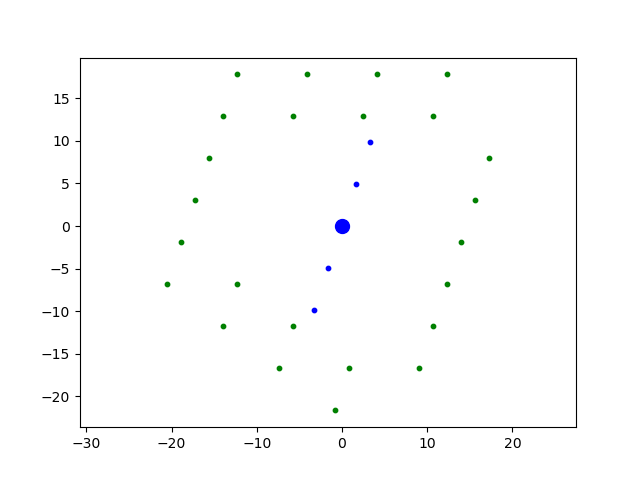

{'linewidth_Kikuchi': 1,
 'linewidth_HOLZ': 1,
 'color_map': 'hot',
 'background': None,
 'color_Laue_Zones': ['blue', 'green', 'red'],
 'plot_labels': False,
 'plot_reflections': True,
 'color_reflections': None,
 'color_zero': 'blue',
 'plot_dynamically_allowed': False,
 'plot_forbidden': False,
 'plot_HOLZ': False,
 'plot_Kikuchi': False,
 'color_ring_zero': 'None'}

In [41]:
tags = {'acceleration_voltage_V': 99.2 * 1000.0,  # V
      'convergence_angle_mrad': 7.15,  # mrad;
      'zone_hkl': np.array([-2, 2, 1]),
      'mistilt': np.array([0, 0, 0]),  # mistilt in degrees
      'Sg_max': .03,  # 1/A  maximum allowed excitation error
      'hkl_max': 9}  # Highest evaluated Miller indices

diff_dict = pyTEMlib.diffraction_tools.get_bragg_reflections(atoms, tags) 
diff_dict['output'] = {}
fig = pyTEMlib.diffraction_tools.plot_diffraction_pattern(diff_dict, diffraction_pattern=None)
diff_dict['output']

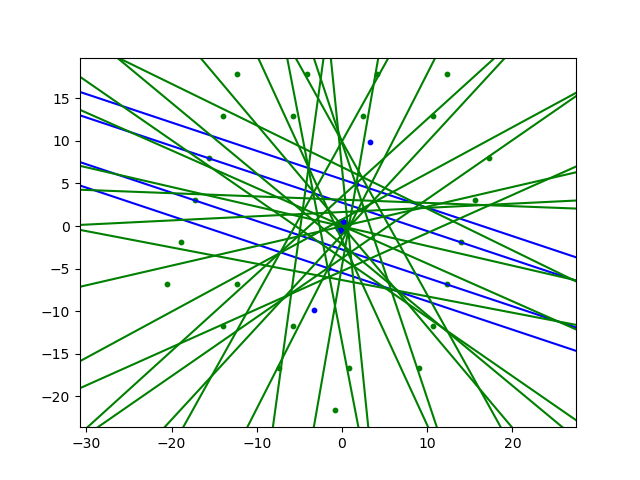

In [42]:
diff_dict['output']['plot_HOLZ'] = True

fig = pyTEMlib.diffraction_tools.plot_diffraction_pattern(diff_dict, diffraction_pattern=None)

## Conclusion
The scattering geometry provides all the tools to determine which reciprocal lattice points are possible and which of them are allowed.

The diffraction pattern is a projection onto the plane perpendicular to the zone axis. For an easy projection we tilt everything so that the x,y plane  is our projection plane.

Determination of Bragg reflections in polar coordinates allows for easy rotation in plane and calculation of Kikuchi and HOLZ lines.


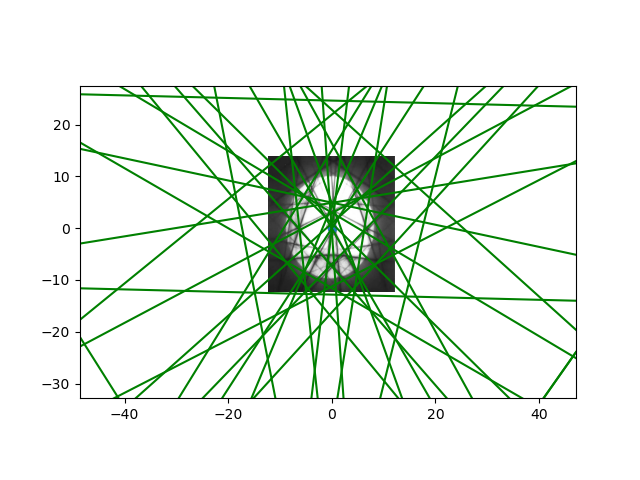

In [144]:
tags = {'acceleration_voltage_V': 99.2 * 1000.0,  # V
      'convergence_angle_mrad': 7.15,  # mrad;
      'zone_hkl': np.array([-2, 2, 1]),
      'mistilt': np.array([0, 0, 0]),  # mistilt in degrees
      'Sg_max': .07,  # 1/A  maximum allowed excitation error
      'hkl_max': 7}  # Highest evaluated Miller indices

diff_dict = pyTEMlib.diffraction_tools.get_bragg_reflections(atoms, tags) 


zolz = diff_dict['allowed']['ZOLZ']

xy_folz = plotting_coordinates(diff_dict['HOLZ']['g_deficient'][folz], rotation=np.radians(107-180),feature='line')

img = matplotlib.image.imread('Zuo-HOLZ-experiment.jpg')
plt.figure()
extent=np.array([-28-.5, 28-.5, -30+1.5, 30+1.5])/2.3
plt.imshow(img, extent=extent)
plt.scatter(0,0)
if len(xy_folz) > 0:
    plt.axline(xy_folz[0, :2], slope=xy_folz[0, 2], label='FOLZ', c='g')
    for xy in xy_folz:
        plt.axline(xy[:2], slope=xy[2], c='g')


(np.float64(2.5865),
 np.float64(-2.5735),
 np.float64(-2.537),
 np.float64(2.623))

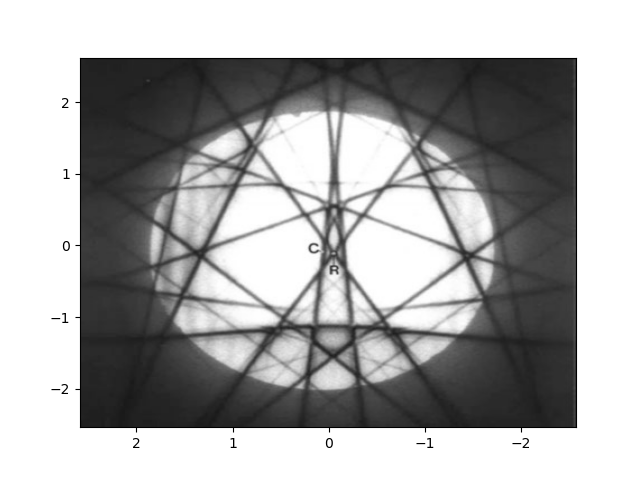

In [548]:
tags['zone_hkl'] = np.array([-2,2,1])  # incident neares zone axis: defines Laue Zones!!!!
tags['mistilt']  = np.array([-0.0,-0.0,-0.0])  # mistilt in degrees

tags['Sg_max'] = .04 # 1/nm  maximum allowed excitation error ; This parameter is related to the thickness
tags['hkl_max'] = 9   # Highest evaluated Miller indices
tags['convergence_angle_A-1'] = 1.9
tags

tagsD = pyTEMlib.diffraction_tools.get_bragg_reflections(atoms, tags, False)

tagsD['convergence_angle_A-1'] = .19
tagsD['plot_rotation'] = 162
tagsD['plot image FOV'] = 5.16
tagsD['plot shift x'] = 0.0065
tagsD['plot shift y'] = .043



# we sort them by order of Laue zone
ZOLZ = tagsD['allowed']['ZOLZ']
HOLZ = tagsD['allowed']['HOLZ']

l = -tagsD['plot image FOV']/2+tagsD['plot shift x']
r = tagsD['plot image FOV']/2+tagsD['plot shift x']
t = -tagsD['plot image FOV']/2+tagsD['plot shift y']
b = tagsD['plot image FOV']/2+tagsD['plot shift y']
extent=np.array([r,l,t,b])
plt.figure()#
plt.imshow(image, extent=(r,l,t,b))
plt.axis('auto')

array([ 0.58522222, -0.56144444, -0.93495116,  1.29957778])

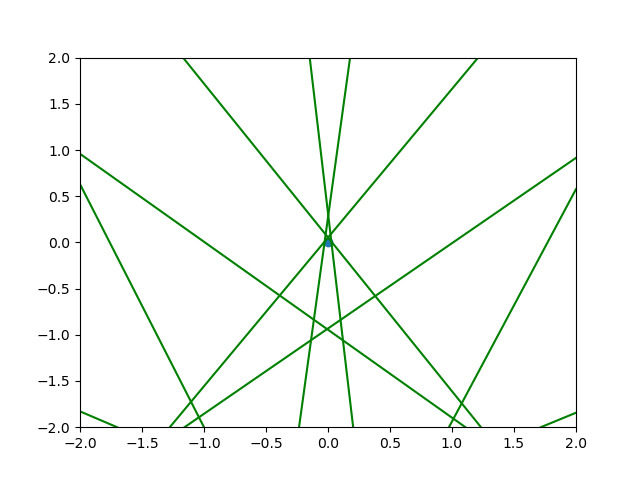

In [373]:
tags['Sg_max'] = .07 # 1/nm  maximum allowed excitation error ; This parameter is related to the thickness
tags['hkl_max'] = 23   # Highest evaluated Miller indices
tags['convergence_angle_A-1'] = 1.9
tags

tagsD = pyTEMlib.diffraction_tools.get_bragg_reflections(atoms, tags, False)


image = matplotlib.image.imread('Zuo-HOLZ-experiment.jpg')
holz = diff_dict['allowed']['HOLZ']
xy_folz = plotting_coordinates(diff_dict['HOLZ']['g_deficient'][holz], rotation=np.radians(108),feature='line')
extent[:2]+= 0.#047
extent[2:] -=0.0#24#135
extent[2:] *=1.1
extent /=1#.5
plt.figure()#
#plt.imshow(image, extent=extent)
plt.scatter(0,0)
if len(xy_folz) > 0:
    plt.axline(xy_folz[0, :2], slope=xy_folz[0, 2], label='FOLZ', c='g')
    for xy in xy_folz:
        plt.axline(xy[:2], slope=xy[2], c='g')
#plt.scatter(g_closest[:,0],g_closest[:,1])

plt.gca().set_xlim(-2,2)
plt.gca().set_ylim(-2,2)
extent

In [438]:
dd = {'crystal_name': 'silicon',
                              'acceleration_voltage': 100.8*1000.0, #V
                              'convergence_angle_mrad': 5.,
                              'Sg_max': .03,   # 1/Ang  maximum allowed excitation error ; This parameter is related to the thickness
                              'hkl_max': 9,   # Highest evaluated Miller indices
                              'zone_hkl': np.array([1, 2, -2]),  
                              'mistilt_alpha degree': 0.,  # -45#-35-0.28-1+2.42
                              'mistilt_beta degree': 0.,
                              'plot_FOV': .5}

tagsD = pyTEMlib.diffraction_tools.get_bragg_reflections(atoms, dd, False)

[-5.21765310e+00  5.21765310e+00 -1.04353062e+01  1.04353062e+01
  1.30441327e+01 -1.30441327e+01  2.60882654e+00 -2.60882654e+00
 -1.04353062e+01  1.04353062e+01  7.82647963e+00 -7.82647963e+00
  1.56529593e+01 -1.56529593e+01 -2.60882646e+00  2.60882646e+00
  1.56529592e+01  1.82617858e+01 -1.82617858e+01 -1.56529592e+01
 -1.30441327e+01 -7.82647960e+00  7.82647960e+00  1.30441327e+01
 -1.30441328e+01 -2.08706124e+01  2.08706124e+01  1.30441328e+01
 -1.42685639e-16 -1.30441327e+01  1.30441327e+01  2.34794389e+01
 -2.34794389e+01 -2.34794389e+01  2.34794389e+01 -1.82617858e+01
  2.60882650e+00 -2.60882650e+00  1.82617858e+01 -7.82647964e+00
  7.82647964e+00  2.86970919e+01 -2.86970919e+01 -1.30441327e+01
 -2.60882653e+01  2.60882653e+01  1.30441327e+01  2.86970919e+01
 -2.86970919e+01  3.13059184e+01 -3.13059184e+01  2.34794388e+01
 -2.34794388e+01 -2.60882654e+01  1.82617858e+01 -1.82617858e+01
  2.60882654e+01  3.13059184e+01 -3.13059184e+01 -2.60882653e+01
  2.60882653e+01  2.60882

(np.float64(-29.610181222255523),
 np.float64(28.740572430386052),
 np.float64(-40.175928751954935),
 np.float64(40.175928751954935))

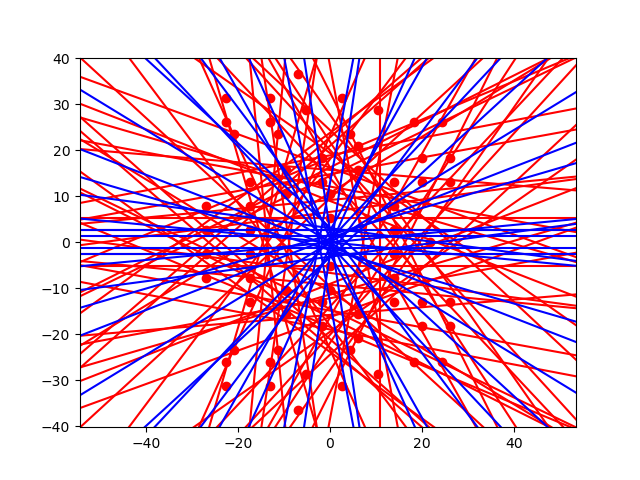

In [439]:
r = np.array([3.18447863, 2.91675674, 2.91675674, 3.18447863, 3.56857635,
       3.56857635, 2.17402212, 2.70838136, 2.38786419, 2.38786419,
       2.70838136, 3.18447863, 3.18447863, 1.9072011 , 1.59638964,
       1.41562064, 1.41562064, 1.59638964, 1.9072011 , 3.05355318,
       3.05355318, 2.17402212, 1.67949365, 1.67949365, 2.17402212,
       2.38786419, 2.38786419, 3.14144315, 3.14144315, 1.04353062,
       0.52176531, 0.52176531, 1.04353062, 1.83444187, 1.31595698,
       1.31595698, 1.83444187, 2.91675674, 2.91675674, 3.71802277,
       3.71802277, 1.83444187, 1.41562064, 1.41562064, 1.83444187,
       2.60592623, 2.60592623, 3.3914745 , 2.91675674, 2.91675674,
       3.3914745 , 2.17402212, 1.9072011 , 1.75867505, 1.75867505,
       1.9072011 , 2.17402212, 3.14144315, 3.14144315, 3.86168998,
       3.45224855, 3.45224855, 3.86168998, 2.80709951, 2.70838136,
       2.70838136, 2.80709951])
phi = np.array([-6.10725964e-01, -4.63647609e-01,  4.63647609e-01,  6.10725964e-01,
       -8.19867264e-01,  8.19867264e-01, -6.56321008e-18, -7.39974884e-01,
       -5.77901937e-01,  5.77901937e-01,  7.39974884e-01, -9.60070362e-01,
        9.60070362e-01, -7.53151281e-01, -5.12389460e-01, -1.85347950e-01,
        1.85347950e-01,  5.12389460e-01,  7.53151281e-01, -1.22202532e+00,
        1.22202532e+00, -1.28700222e+00, -1.19990504e+00,  1.19990504e+00,
        1.28700222e+00, -1.38768551e+00,  1.38768551e+00, -1.48765509e+00,
        1.48765509e+00, -1.57079633e+00, -1.57079633e+00,  1.57079633e+00,
        1.57079633e+00, -1.66574803e+00, -1.70334786e+00,  1.70334786e+00,
        1.66574803e+00, -1.75064983e+00,  1.75064983e+00, -1.75901783e+00,
        1.75901783e+00, -2.11934573e+00, -2.31274359e+00,  2.31274359e+00,
        2.11934573e+00, -2.01951967e+00,  2.01951967e+00, -1.96558745e+00,
       -2.03444394e+00,  2.03444394e+00,  1.96558745e+00, -2.49809154e+00,
       -2.71873873e+00, -2.99270271e+00,  2.99270271e+00,  2.71873873e+00,
        2.49809154e+00, -2.29743867e+00,  2.29743867e+00, -2.19628137e+00,
       -2.28488703e+00,  2.28488703e+00,  2.19628137e+00, -2.85903770e+00,
       -3.04511888e+00,  3.04511888e+00,  2.85903770e+00])

so = np.argsort(r)

x = r[so] * np.cos(phi[so])*10
y = r[so] * np.sin(phi[so])*10

xy =  plotting_coordinates(tagsD['HOLZ']['g_deficient']-[0.0, np.pi/2 ,0], feature='line')
print(y)
slope = np.tan(phi[so]+np.pi/2)
print(slope)
plt.figure()
for i in range(len(x)):
    plt.axline((x[i]/2, y[i]/2), slope=slope[i], c='r')
    plt.scatter(x[i],y[i], c='r')
    pass
for i in range(len(xy)):
    plt.axline((xy[i,0]/2, xy[i,1]/2), slope=xy[i,2], c='b')
    #plt.scatter(xy[i,0], xy[i,1], c='b')
    pass
print(len(x), len(xy))
plt.axis('equal')

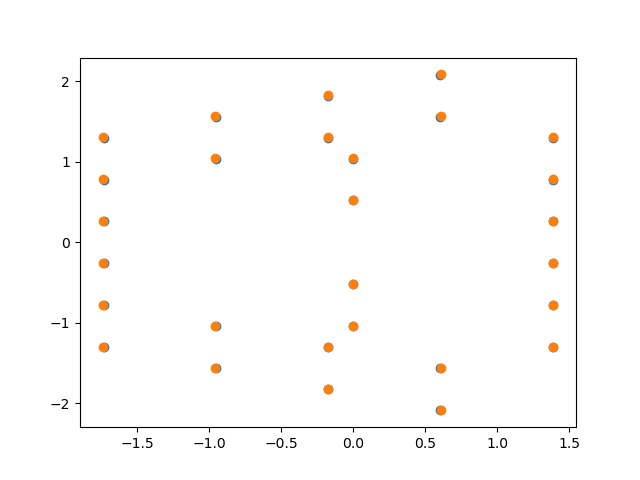

In [440]:
K0 = tagsD['K_0']
r2 = tagsD['allowed']['g'][:,0]
phi2 = tagsD['allowed']['g'][:,1]-np.pi/2

x = r2 * np.cos(phi2)
y = r2 * np.sin(phi2)
z = tagsD['allowed']['g'][:,2]
g_allowed = np.stack((x, y, z), axis=1)
g_a = np.array([[ 1.39137416e+00, -1.30441327e+00,  6.14906313e-02],
       [ 1.39137416e+00, -7.82647963e-01,  6.14906313e-02],
       [ 1.39137416e+00, -2.60882654e-01,  6.14906313e-02],
       [ 1.39137416e+00,  2.60882654e-01,  6.14906313e-02],
       [ 1.39137416e+00,  7.82647963e-01,  6.14906313e-02],
       [ 1.39137416e+00,  1.30441327e+00,  6.14906313e-02],
       [ 6.08726193e-01, -2.08706123e+00,  6.14906313e-02],
       [ 6.08726193e-01, -1.56529593e+00,  6.14906313e-02],
       [ 6.08726193e-01,  1.56529593e+00,  6.14906313e-02],
       [ 6.08726193e-01,  2.08706123e+00,  6.14906313e-02],
       [-4.75724880e-18, -1.04353062e+00, -1.94002166e-17],
       [-2.37862440e-18, -5.21765308e-01, -9.70010829e-18],
       [ 2.37862440e-18,  5.21765308e-01,  9.70010829e-18],
       [ 4.75724880e-18,  1.04353062e+00,  1.94002166e-17],
       [-1.73921769e-01, -1.82617858e+00,  6.14906313e-02],
       [-1.73921769e-01, -1.30441327e+00,  6.14906313e-02],
       [-1.73921769e-01,  1.30441327e+00,  6.14906313e-02],
       [-1.73921769e-01,  1.82617858e+00,  6.14906313e-02],
       [-9.56569732e-01, -1.56529593e+00,  6.14906313e-02],
       [-9.56569732e-01, -1.04353062e+00,  6.14906313e-02],
       [-9.56569732e-01,  1.04353062e+00,  6.14906313e-02],
       [-9.56569732e-01,  1.56529593e+00,  6.14906313e-02],
       [-1.73921769e+00, -1.30441327e+00,  6.14906313e-02],
       [-1.73921769e+00, -7.82647963e-01,  6.14906313e-02],
       [-1.73921769e+00, -2.60882654e-01,  6.14906313e-02],
       [-1.73921769e+00,  2.60882654e-01,  6.14906313e-02],
       [-1.73921769e+00,  7.82647963e-01,  6.14906313e-02],
       [-1.73921769e+00,  1.30441327e+00,  6.14906313e-02]])
plt.figure()
plt.scatter(g_allowed[:, 0], g_allowed[:, 1])
plt.scatter(g_a[:,0], g_a[:,1])

(-2.0, 2.0)

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


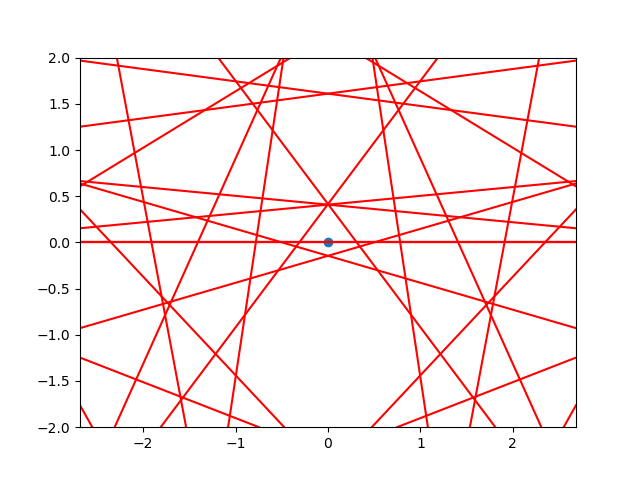

In [448]:
g_norm_allowed = np.linalg.norm(g_allowed, axis=1)

# Dynamic Correction
# Equation Spence+Zuo 3.86a
gamma_1 = - 1./(2.*k_0) * (1 / (2.*k_0*g_norm_allowed)).sum()

# Equation Spence+Zuo 3.84
kg = k_0 - k_0*gamma_1/(g_allowed[:, 2]+1e-15)
kg[:] = k_0

# Calculate angle between K0 and deficient cone vector
# For dynamic calculations K0 is replaced by kg
kg[:] = k_0
    
d_theta = np.arcsin(g_norm_allowed/k_0/2.) - (np.arcsin(np.abs(g_allowed[:, 2])
                                                       /g_norm_allowed))

# calculate length of distance of deficient cone to K0 in ZOLZ plane
gd_length = 2*np.sin(d_theta/2) * k_0

# Calculate nearest point of HOLZ and Kikuchi lines
g_closest = g_allowed.copy()
g_closest = g_closest*(gd_length/np.linalg.norm(g_closest, axis=1))[:, np.newaxis]



# calculate and save line in Hough space coordinates (distance and theta)
slope = -g_closest[:, 0]/(g_closest[:, 1]+1e-10)
distance = gd_length
theta = np.arctan2(g_allowed[:, 0], g_allowed[:, 1])


x = distance * np.cos(theta)*10
y = distance * np.sin(theta)*10

# slope = np.tan(theta+np.pi/2)

plt.figure()
for i in range(len(x)):
    plt.axline((x[i]/2, y[i]/2), slope=slope[i], c='r')
    #plt.scatter(x[i],y[i], c='r')
    pass
plt.scatter(0,0)
plt.axis('equal')
plt.gca().set_xlim(-2,2)
plt.gca().set_ylim(-2,2)



In [453]:
tags_a = {'crystal_name': 'silicon',
 'acceleration_voltage_V': 100800.0,
 'convergence_angle_mrad': 5.0,
 'Sg_max': 0.03,
 'hkl_max': 9,
 'zone_hkl': np.array([ 1,  2, -2]),
 'mistilt_alpha degree': 0.0,
 'mistilt_beta degree': 0.0,
 'plot_FOV': 0.5,
 'mistilt_alpha': np.float64(0.0),
 'mistilt_beta': np.float64(0.0),
 'thickness': 0.0,
 'dynamic correction': 0.0,
 'dynamic correction K0': 0.0,
 'wave_length': np.float64(0.036854054730234266),
 'unit_cell': np.array([[5.42088, 0.     , 0.     ],
        [0.     , 5.42088, 0.     ],
        [0.     , 0.     , 5.42088]]),
 'metric_tensor': np.array([[29.38593997,  0.        ,  0.        ],
        [ 0.        , 29.38593997,  0.        ],
        [ 0.        ,  0.        , 29.38593997]]),
 'reciprocal_unit_cell': np.array([0.18447189386225113, 0.18447189386225113, 0.18447189386225113]),
 'inner_potential_V': np.float64(354754.9006553238),
 'incident_wave_vector_vacuum': np.float64(27.134056410341785),
 'incident_wave_vector': np.float64(27.139436494498113),
 'convergence_angle_A-1': np.float64(0.13569661706827035),
 'y-axis rotation alpha': np.float64(2.8017557441356713),
 'x-axis rotation beta': np.float64(-0.7853981633974483),
 'rotation_matrix': np.array([[-0.94280904,  0.        ,  0.33333333],
        [ 0.23570226,  0.70710678,  0.66666667],
        [-0.23570226,  0.70710678, -0.66666667]]),
 'nearest_zone_axis': np.array([ 1.,  2., -2.]),
 'next_nearest_zone_axes': np.array([[ 3.,  5., -5.],
        [ 2.,  5., -5.]]),
 'mistilt_nearest_zone alpha': np.float64(0.0),
 'mistilt_nearest_zone beta': np.float64(0.0),
 'nearest_zone_axes': {'0': {'hkl': np.array([ 1.,  2., -2.]),
   'mistilt_alpha': np.float64(0.0),
   'mistilt_beta': np.float64(0.0)},
  'amount': 3,
  '1': {'hkl': np.array([ 3.,  5., -5.]),
   'g': np.array([ 0.55341568,  0.92235947, -0.92235947]),
   'mistilt_alpha': np.float64(0.061410232464238934),
   'mistilt_beta': np.float64(0.0)},
  '2': {'hkl': np.array([ 2.,  5., -5.]),
   'g': np.array([ 0.36894379,  0.92235947, -0.92235947]),
   'mistilt_alpha': np.float64(-0.06419411023785626),
   'mistilt_beta': np.float64(0.0)}},
 'k0_vector': np.array([ 0.        ,  0.        , 27.13943649])}

In [455]:
def calculate_holz(dif, tags):
    """ Calculate HOLZ lines (of allowed reflections)"""
    # dif = atoms.info['diffraction']
    intensities = dif['allowed']['intensities']
    k_0 = tags['incident_wave_vector']
    g_norm_allowed = np.linalg.norm(dif['allowed']['g'], axis=1)

    # Dynamic Correction
    # Equation Spence+Zuo 3.86a
    gamma_1 = - 1./(2.*k_0) * (intensities / (2.*k_0*dif['allowed']['sg'])).sum()

    # Equation Spence+Zuo 3.84
    kg = k_0 - k_0*gamma_1/(dif['allowed']['g'][:, 2]+1e-15)
    kg[dif['allowed']['ZOLZ']] = k_0

    # Calculate angle between K0 and deficient cone vector
    # For dynamic calculations K0 is replaced by kg
    kg[:] = k_0
    d_theta = np.arcsin(g_norm_allowed/kg/2.) - (np.arcsin(np.abs(dif['allowed']['g'][:, 2])
                                                           /g_norm_allowed))

    # calculate length of distance of deficient cone to K0 in ZOLZ plane
    gd_length = 2*np.sin(d_theta/2) * k_0

    # Calculate nearest point of HOLZ and Kikuchi lines
    g_closest = dif['allowed']['g'].copy()
    g_closest = g_closest*(gd_length/np.linalg.norm(g_closest, axis=1))[:, np.newaxis]

    g_closest[:, 2] = 0.

    # calculate and save line in Hough space coordinates (distance and theta)
    slope = g_closest[:, 0]/(g_closest[:, 1]+1e-10)
    distance = gd_length
    theta = np.arctan2(dif['allowed']['g'][:, 0], dif['allowed']['g'][:, 1])

    dif['HOLZ'] = {}
    dif['HOLZ']['slope'] = slope

    return distance, theta
r, phi = calculate_holz(tags_a, tagsD)
x = r * np.cos(phi)*10
y = r * np.sin(phi)*10

slope = np.tan(phi+np.pi/2)
print(r)
plt.figure()
for i in range(len(x)):
    plt.axline((x[i], y[i]), slope=slope[i], c='r')
    #plt.scatter(x[i],y[i], c='r')
    pass
print(len(x))
plt.axis('equal')

KeyError: 'allowed'

In [405]:
np.sort([[ 1.39137416e+00, -1.30441327e+00,  6.14906313e-02],
       [ 1.39137416e+00, -7.82647963e-01,  6.14906313e-02],
       [ 1.39137416e+00, -2.60882654e-01,  6.14906313e-02],
       [ 1.39137416e+00,  2.60882654e-01,  6.14906313e-02],
       [ 1.39137416e+00,  7.82647963e-01,  6.14906313e-02],
       [ 1.39137416e+00,  1.30441327e+00,  6.14906313e-02],
       [ 6.08726193e-01, -2.08706123e+00,  6.14906313e-02],
       [ 6.08726193e-01, -1.56529593e+00,  6.14906313e-02],
       [ 6.08726193e-01,  1.56529593e+00,  6.14906313e-02],
       [ 6.08726193e-01,  2.08706123e+00,  6.14906313e-02],
       [-4.75724880e-18, -1.04353062e+00, -1.94002166e-17],
       [-2.37862440e-18, -5.21765308e-01, -9.70010829e-18],
       [ 2.37862440e-18,  5.21765308e-01,  9.70010829e-18],
       [ 4.75724880e-18,  1.04353062e+00,  1.94002166e-17],
       [-1.73921769e-01, -1.82617858e+00,  6.14906313e-02],
       [-1.73921769e-01, -1.30441327e+00,  6.14906313e-02],
       [-1.73921769e-01,  1.30441327e+00,  6.14906313e-02],
       [-1.73921769e-01,  1.82617858e+00,  6.14906313e-02],
       [-9.56569732e-01, -1.56529593e+00,  6.14906313e-02],
       [-9.56569732e-01, -1.04353062e+00,  6.14906313e-02],
       [-9.56569732e-01,  1.04353062e+00,  6.14906313e-02],
       [-9.56569732e-01,  1.56529593e+00,  6.14906313e-02],
       [-1.73921769e+00, -1.30441327e+00,  6.14906313e-02],
       [-1.73921769e+00, -7.82647963e-01,  6.14906313e-02],
       [-1.73921769e+00, -2.60882654e-01,  6.14906313e-02],
       [-1.73921769e+00,  2.60882654e-01,  6.14906313e-02],
       [-1.73921769e+00,  7.82647963e-01,  6.14906313e-02],
       [-1.73921769e+00,  1.30441327e+00,  6.14906313e-02]], axis=0)

array([[-1.73921769e+00, -2.08706123e+00, -1.94002166e-17],
       [-1.73921769e+00, -1.82617858e+00, -9.70010829e-18],
       [-1.73921769e+00, -1.56529593e+00,  9.70010829e-18],
       [-1.73921769e+00, -1.56529593e+00,  1.94002166e-17],
       [-1.73921769e+00, -1.30441327e+00,  6.14906313e-02],
       [-1.73921769e+00, -1.30441327e+00,  6.14906313e-02],
       [-9.56569732e-01, -1.30441327e+00,  6.14906313e-02],
       [-9.56569732e-01, -1.04353062e+00,  6.14906313e-02],
       [-9.56569732e-01, -1.04353062e+00,  6.14906313e-02],
       [-9.56569732e-01, -7.82647963e-01,  6.14906313e-02],
       [-1.73921769e-01, -7.82647963e-01,  6.14906313e-02],
       [-1.73921769e-01, -5.21765308e-01,  6.14906313e-02],
       [-1.73921769e-01, -2.60882654e-01,  6.14906313e-02],
       [-1.73921769e-01, -2.60882654e-01,  6.14906313e-02],
       [-4.75724880e-18,  2.60882654e-01,  6.14906313e-02],
       [-2.37862440e-18,  2.60882654e-01,  6.14906313e-02],
       [ 2.37862440e-18,  5.21765308e-01

In [403]:
np.sort(g_allowed, axis=0)

array([[-1.73209799e+00, -2.07851759e+00, -1.75066544e-17],
       [-1.73209799e+00, -1.81870289e+00, -8.75332720e-18],
       [-1.73209799e+00, -1.55888819e+00,  8.75332720e-18],
       [-1.73209799e+00, -1.55888819e+00,  1.75066544e-17],
       [-1.73209799e+00, -1.29907349e+00,  6.13774072e-02],
       [-1.73209799e+00, -1.29907349e+00,  6.13774072e-02],
       [-9.52653895e-01, -1.29907349e+00,  6.13774072e-02],
       [-9.52653895e-01, -1.04160914e+00,  6.13774072e-02],
       [-9.52653895e-01, -1.03925879e+00,  6.13774072e-02],
       [-9.52653895e-01, -7.79444096e-01,  6.13774072e-02],
       [-1.73209799e-01, -7.79444096e-01,  6.13774072e-02],
       [-1.73209799e-01, -5.20804570e-01,  6.13774072e-02],
       [-1.73209799e-01, -2.59814699e-01,  6.13774072e-02],
       [-1.73209799e-01, -2.59814699e-01,  6.13774072e-02],
       [-1.91340495e-16,  2.59814699e-01,  6.13774072e-02],
       [-9.56702475e-17,  2.59814699e-01,  6.13774072e-02],
       [ 3.18900825e-17,  5.20804570e-01

In [382]:
wavelength = pyTEMlib.diffraction_tools.basic.get_wavelength(100.8*1000.0, unit='Å')  # in Angstrom
u_0 = pyTEMlib.diffraction_tools.basic.get_inner_potential(atoms)
incident_wave_vector = np.sqrt(1/wavelength**2 + u_0/atoms.cell.volume )#1/Ang
incident_wave_vector

np.float64(27.13565574837092)

In [290]:
np.round(np.degrees((tagsD['allowed']['g'][:,1])),1)

array([-180. ,    0. , -180. ,    0. , -172.4,   -7.6,  100.6,   79.4,
        -42.5, -137.5,   60.6,  119.4,  158.7,   21.3,  -98.5,  -81.5,
        -31.4,   -5.4, -174.6, -148.6,  -65.8,   46.8,  133.2, -114.2,
       -126.9,  -53.1,  163.7,   90. ,   16.3,   10.5,   56.9,  169.5,
        123.1,  -25.7, -154.3,  132.4,   47.6,  -84.5,  -95.5, -106.2,
        -73.8, -153.4,  -26.6,  -10.3,  116.6,   63.4, -169.7,  160. ,
         20. ,  -41.6,    4.8,  175.2, -138.4,  145. ,   55. ,  125. ,
         35. ,  -22.6, -157.4,  -40.9, -139.1,  137. ,   43. ,  -10.8,
       -169.2,  -35.8, -144.2])

In [296]:
np.round(np.degrees(np.array([-1.57079633e+00,  1.57079633e+00, -1.57079633e+00,  1.57079633e+00,
        1.70334786e+00, -1.70334786e+00,  1.85347950e-01, -1.85347950e-01,
       -2.31274359e+00,  2.31274359e+00,  5.12389460e-01, -5.12389460e-01,
        1.19990504e+00, -1.19990504e+00, -2.99270271e+00,  2.99270271e+00,
        2.11934573e+00,  1.66574803e+00, -1.66574803e+00, -2.11934573e+00,
       -7.53151281e-01, -2.71873873e+00,  7.53151281e-01,  2.71873873e+00,
       -2.49809154e+00, -1.28700222e+00,  1.28700222e+00,  2.49809154e+00,
       -6.56321008e-18, -5.77901937e-01,  5.77901937e-01,  1.38768551e+00,
       -1.38768551e+00, -2.01951967e+00,  2.01951967e+00, -7.39974884e-01,
        3.04511888e+00, -3.04511888e+00,  7.39974884e-01, -2.85903770e+00,
        2.85903770e+00,  1.75064983e+00, -1.75064983e+00, -4.63647609e-01,
       -2.03444394e+00,  2.03444394e+00,  4.63647609e-01,  1.22202532e+00,
       -1.22202532e+00,  2.29743867e+00, -2.29743867e+00,  1.48765509e+00,
       -1.48765509e+00, -6.10725964e-01,  6.10725964e-01, -9.60070362e-01,
        9.60070362e-01,  1.96558745e+00, -1.96558745e+00, -2.28488703e+00,
        2.28488703e+00,  8.19867264e-01, -8.19867264e-01,  1.75901783e+00,
       -1.75901783e+00,  2.19628137e+00, -2.19628137e+00])),1)%180

array([ 90. ,  90. ,  90. ,  90. ,  97.6,  82.4,  10.6, 169.4,  47.5,
       132.5,  29.4, 150.6,  68.7, 111.3,   8.5, 171.5, 121.4,  95.4,
        84.6,  58.6, 136.8,  24.2,  43.2, 155.8,  36.9, 106.3,  73.7,
       143.1,   0. , 146.9,  33.1,  79.5, 100.5,  64.3, 115.7, 137.6,
       174.5,   5.5,  42.4,  16.2, 163.8, 100.3,  79.7, 153.4,  63.4,
       116.6,  26.6,  70. , 110. , 131.6,  48.4,  85.2,  94.8, 145. ,
        35. , 125. ,  55. , 112.6,  67.4,  49.1, 130.9,  47. , 133. ,
       100.8,  79.2, 125.8,  54.2])

In [295]:
(np.round(np.degrees((tagsD['allowed']['g'][:,1])),1)+90) %180

array([ 90. ,  90. ,  90. ,  90. ,  97.6,  82.4,  10.6, 169.4,  47.5,
       132.5, 150.6,  29.4,  68.7, 111.3, 171.5,   8.5,  58.6,  84.6,
        95.4, 121.4,  24.2, 136.8,  43.2, 155.8, 143.1,  36.9,  73.7,
         0. , 106.3, 100.5, 146.9,  79.5,  33.1,  64.3, 115.7,  42.4,
       137.6,   5.5, 174.5, 163.8,  16.2, 116.6,  63.4,  79.7,  26.6,
       153.4, 100.3,  70. , 110. ,  48.4,  94.8,  85.2, 131.6,  55. ,
       145. ,  35. , 125. ,  67.4, 112.6,  49.1, 130.9,  47. , 133. ,
        79.2, 100.8,  54.2, 125.8])

In [191]:
np.sort(np.array([3.18447863, 2.91675674, 2.91675674, 3.18447863, 3.56857635,
       3.56857635, 2.17402212, 2.70838136, 2.38786419, 2.38786419,
       2.70838136, 3.18447863, 3.18447863, 1.9072011 , 1.59638964,
       1.41562064, 1.41562064, 1.59638964, 1.9072011 , 3.05355318,
       3.05355318, 2.17402212, 1.67949365, 1.67949365, 2.17402212,
       2.38786419, 2.38786419, 3.14144315, 3.14144315, 1.04353062,
       0.52176531, 0.52176531, 1.04353062, 1.83444187, 1.31595698,
       1.31595698, 1.83444187, 2.91675674, 2.91675674, 3.71802277,
       3.71802277, 1.83444187, 1.41562064, 1.41562064, 1.83444187,
       2.60592623, 2.60592623, 3.3914745 , 2.91675674, 2.91675674,
       3.3914745 , 2.17402212, 1.9072011 , 1.75867505, 1.75867505,
       1.9072011 , 2.17402212, 3.14144315, 3.14144315, 3.86168998,
       3.45224855, 3.45224855, 3.86168998, 2.80709951, 2.70838136,
       2.70838136, 2.80709951]))

array([0.52176531, 0.52176531, 1.04353062, 1.04353062, 1.31595698,
       1.31595698, 1.41562064, 1.41562064, 1.41562064, 1.41562064,
       1.59638964, 1.59638964, 1.67949365, 1.67949365, 1.75867505,
       1.75867505, 1.83444187, 1.83444187, 1.83444187, 1.83444187,
       1.9072011 , 1.9072011 , 1.9072011 , 1.9072011 , 2.17402212,
       2.17402212, 2.17402212, 2.17402212, 2.17402212, 2.38786419,
       2.38786419, 2.38786419, 2.38786419, 2.60592623, 2.60592623,
       2.70838136, 2.70838136, 2.70838136, 2.70838136, 2.80709951,
       2.80709951, 2.91675674, 2.91675674, 2.91675674, 2.91675674,
       2.91675674, 2.91675674, 3.05355318, 3.05355318, 3.14144315,
       3.14144315, 3.14144315, 3.14144315, 3.18447863, 3.18447863,
       3.18447863, 3.18447863, 3.3914745 , 3.3914745 , 3.45224855,
       3.45224855, 3.56857635, 3.56857635, 3.71802277, 3.71802277,
       3.86168998, 3.86168998])

In [297]:
tagsD['allowed']['g'][:,0]

array([0.52080457, 0.52080457, 1.04160914, 1.04160914, 1.31056994,
       1.31056994, 1.40982562, 1.40982562, 1.40982562, 1.40982562,
       1.58985462, 1.58985462, 1.67261843, 1.67261843, 1.7514757 ,
       1.7514757 , 1.82693236, 1.82693236, 1.82693236, 1.82693236,
       1.89939373, 1.89939373, 1.89939373, 1.89939373, 2.16512249,
       2.16512249, 2.16512249, 2.16512249, 2.16512249, 2.37273519,
       2.37273519, 2.37273519, 2.37273519, 2.58941564, 2.58941564,
       2.69122164, 2.69122164, 2.69122164, 2.69122164, 2.78931433,
       2.78931433, 2.89176634, 2.89176634, 2.89176634, 2.89176634,
       2.89176634, 2.89176634, 3.02739072, 3.02739072, 3.11452767,
       3.11452767, 3.11452767, 3.11452767, 3.15719442, 3.15719442,
       3.15719442, 3.15719442, 3.36241678, 3.36241678, 3.41499894,
       3.41499894, 3.53007157, 3.53007157, 3.67790547, 3.67790547,
       3.82002251, 3.82002251])

In [ ]:
array([0.02539517, 0.2516626 , 0.2516626 , 0.02539517, 0.07761714,
       0.07761714, 0.32019248, 0.12452951, 0.20035071, 0.20035071,
       0.12452951, 0.02539517, 0.02539517, 0.07954378, 0.24577029,
       0.46911475, 0.46911475, 0.24577029, 0.07954378, 0.1069969 ,
       0.1069969 , 0.32019248, 0.15265546, 0.15265546, 0.32019248,
       0.20035071, 0.20035071, 0.01751422, 0.01751422, 0.52178942,
       0.26088567, 0.26088567, 0.52178942, 0.0085308 , 0.60778383,
       0.60778383, 0.0085308 , 0.2516626 , 0.2516626 , 0.07161137,
       0.07161137, 0.0085308 , 0.46911475, 0.46911475, 0.0085308 ,
       0.02504851, 0.02504851, 0.22428443, 0.2516626 , 0.2516626 ,
       0.22428443, 0.32019248, 0.07954378, 0.06845084, 0.06845084,
       0.07954378, 0.32019248, 0.01751422, 0.01751422, 0.209715  ,
       0.19816566, 0.19816566, 0.209715  , 0.21707503, 0.12452951,
       0.12452951, 0.21707503])

In [126]:
plt.scatter(0,0)
if len(xy_folz) > 0:
    plt.axline(xy_folz[0, :2], slope=xy_folz[0, 2], label='FOLZ', c='g')
    for xy in xy_folz:
        plt.axline(xy[:2], slope=xy[2], c='g')